In [ ]:
# Elaborated based on the wonderful tutorial by Data Science Tutorials (https://youtu.be/NPznsxeL3FM)

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as po
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [79]:
# Read the most up-to-date dataset directly from the WHO website
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
data = pd.read_csv(url)

In [80]:
data.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
data_FI = data[data.Country_code == 'FI']
data_FI.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
26270,2020-01-03,FI,Finland,EURO,0,0,0,0
26271,2020-01-04,FI,Finland,EURO,0,0,0,0
26272,2020-01-05,FI,Finland,EURO,0,0,0,0
26273,2020-01-06,FI,Finland,EURO,0,0,0,0
26274,2020-01-07,FI,Finland,EURO,0,0,0,0
26275,2020-01-08,FI,Finland,EURO,0,0,0,0
26276,2020-01-09,FI,Finland,EURO,0,0,0,0
26277,2020-01-10,FI,Finland,EURO,0,0,0,0
26278,2020-01-11,FI,Finland,EURO,0,0,0,0
26279,2020-01-12,FI,Finland,EURO,0,0,0,0


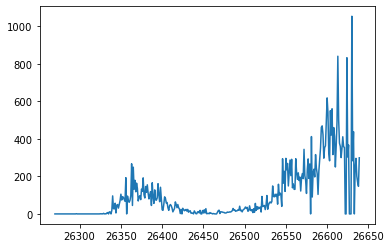

In [5]:
# First plot with matplotlib
plt.plot(data_FI.New_cases)
plt.show()

In [6]:
# Plot the same graph with Plotly
po.plot([{
    'x' : data_FI.index,
    'y' : data_FI.New_cases
}])

'temp-plot.html'

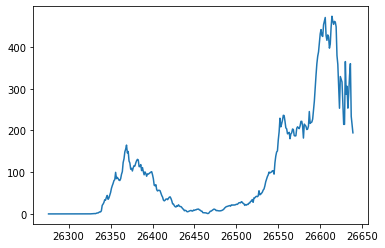

In [7]:
# Calculate a 7-day rolling average
data_FI_MA = data_FI.assign(MA = lambda x: data_FI.New_cases.rolling(window = 7).mean())
data_FI_MA

plt.plot(data_FI_MA.MA)
plt.show()

In [8]:
# Plot both the number of new cases and the 7-day rolling average
data_FI_MA = data_FI_MA[['Date_reported', 'New_cases', 'MA']]
data_FI_MA.set_index('Date_reported', inplace = True)
data_FI_MA

,New_cases,MA
Date_reported,,
2020-01-03,0,NaN
2020-01-04,0,NaN
2020-01-05,0,NaN
2020-01-06,0,NaN
2020-01-07,0,NaN
...,...,...
2021-01-02,296,331.285714
2021-01-03,201,360.000000
2021-01-04,168,233.571429


In [9]:
po.plot([{
    'x' : data_FI_MA.index,
    'y' : data_FI_MA[col],
    'name' : col,
} for col in data_FI_MA.columns])

'temp-plot.html'

In [94]:
# Scatter plot of New cases vs New deaths
data_US = data[data.Country_code == 'US']
trace = [go.Scatter(
            x = data_US.New_cases,
            y = data_US.New_deaths,
            mode = 'markers'
            )
        ]

In [95]:
layout = go.Layout(
    title = 'Coronavirus cases vs deaths in the USA',
    xaxis = dict(title = 'New cases'),
    yaxis = dict(title = 'New deaths'),
    hovermode = 'closest'
)

In [96]:
figure = go.Figure(data=trace, layout = layout)

In [97]:
po.plot(figure)

'temp-plot.html'

In [106]:
# Construct a pivot table to study the total corona cases between US, ES, IT, SWE and FIN
pivot_subset = data[(data.Country_code == 'US') | (data.Country_code == 'SE') | (data.Country_code == 'FI') | (data.Country_code == 'ES') | (data.Country_code == 'IT')]
cases_pivot = pd.pivot_table(pivot_subset, values = 'New_cases', index = 'Country_code', aggfunc='sum')

In [107]:
cases_pivot

,New_cases
Country_code,
ES,1893502
FI,37218
IT,2181619
SE,469748
US,20643544


In [108]:
trace = [go.Bar(x = cases_pivot.index, y = cases_pivot.New_cases,
                name = 'Total coronavirus cases per country')]
    

In [109]:
layout = go.Layout(title = 'Total coronavirus cases per country')

In [110]:
fig = go.Figure(data=trace, layout=layout)

In [111]:
# Fix this 31.12.2020
po.plot(fig)

'temp-plot.html'